In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


### Import libraries.

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, classification_report

### Overview of the data.

In [3]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19295,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


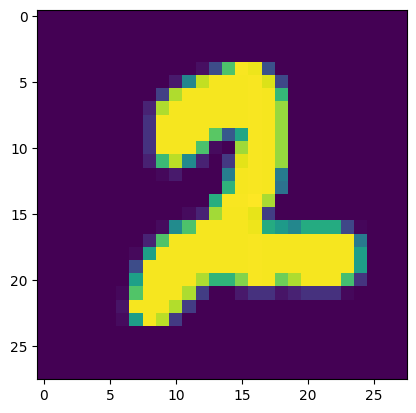

In [5]:
# show a single image how it looks like.
plt.imshow(df.iloc[26854, 1:].values.reshape(28, 28)) 

In [6]:
X = df.iloc[ : , 1:]
y = df['label']

In [7]:
# here we do train test split. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


### Apply the classification algorithm here we choose KNeighborClassifier without PCA.

In [9]:
# Object of the model.
knn_model = KNeighborsClassifier()

# fit on the training data.
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
# predict on the testing data. 
y_pred = knn_model.predict(X_test)

In [11]:
# check the accuracy score. 
print('Accuracy Score : ', accuracy_score(y_test, y_pred))

Accuracy Score :  0.9658333333333333


In [12]:
# here we also see the classification report. 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       825
           1       0.95      0.99      0.97       925
           2       0.98      0.95      0.97       808
           3       0.96      0.96      0.96       866
           4       0.98      0.96      0.97       823
           5       0.96      0.96      0.96       806
           6       0.98      0.99      0.98       824
           7       0.96      0.97      0.96       887
           8       0.99      0.93      0.96       830
           9       0.95      0.95      0.95       806

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



## Now we apply PCA and then Classifier.

In [13]:
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [14]:
# step 1 : Standardise the input values around the zero(Mean Centering).
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# apply PCA.
pca = PCA(n_components = 250)

# fit the X_train and X_test values.
X_train_transform = pca.fit_transform(X_train) 
X_test_transform = pca.transform(X_test)

In [16]:
# shape remains the same because we apply n_components = None.
print(X_train_transform.shape)
print(X_test_transform.shape)

(33600, 250)
(8400, 250)


In [17]:
# apply KNN.
pca_knn = KNeighborsClassifier()

# training. 
pca_knn.fit(X_train_transform, y_train)

KNeighborsClassifier()

In [18]:
# predict on the testing data. 
y_pred = pca_knn.predict(X_test_transform)

In [19]:
# check the accuracy score. 
print('Accuracy Score : ', accuracy_score(y_test, y_pred))

Accuracy Score :  0.9451190476190476


In [20]:
### Here we try multiple components of the PCA.

for i in range(1, 200):
    # apply PCA.
    pca = PCA(n_components = i)

    # fit the X_train and X_test values.
    X_train_transform = pca.fit_transform(X_train) 
    X_test_transform = pca.transform(X_test)

    # apply KNN.
    pca_knn = KNeighborsClassifier()
    
    # training. 
    pca_knn.fit(X_train_transform, y_train)

    # predict on the testing data. 
    y_pred = pca_knn.predict(X_test_transform)

    # check the accuracy score. 
    print('Accuracy Score : ', accuracy_score(y_test, y_pred))

Accuracy Score :  0.25976190476190475
Accuracy Score :  0.32261904761904764
Accuracy Score :  0.5086904761904761
Accuracy Score :  0.6697619047619048
Accuracy Score :  0.736547619047619
Accuracy Score :  0.8265476190476191
Accuracy Score :  0.8379761904761904
Accuracy Score :  0.8678571428571429
Accuracy Score :  0.883095238095238
Accuracy Score :  0.9035714285714286
Accuracy Score :  0.910952380952381
Accuracy Score :  0.9173809523809524
Accuracy Score :  0.9239285714285714
Accuracy Score :  0.930952380952381
Accuracy Score :  0.9345238095238095
Accuracy Score :  0.9361904761904762
Accuracy Score :  0.9357142857142857
Accuracy Score :  0.9369047619047619
Accuracy Score :  0.9397619047619048
Accuracy Score :  0.9416666666666667
Accuracy Score :  0.9417857142857143
Accuracy Score :  0.9407142857142857
Accuracy Score :  0.9428571428571428
Accuracy Score :  0.9436904761904762
Accuracy Score :  0.9446428571428571
Accuracy Score :  0.9457142857142857
Accuracy Score :  0.9467857142857142
Acc

In [21]:
# Eigen values of each vector.
pca.explained_variance_

array([40.68421956, 29.06032402, 26.81728143, 20.80660653, 18.13291656,
       15.86465694, 13.71564128, 12.56008458, 11.07027177, 10.06143992,
        9.64865053,  8.6348127 ,  8.08421489,  7.88243507,  7.46509518,
        7.18292927,  6.78343699,  6.61002911,  6.42366468,  6.25643954,
        5.94859161,  5.76767345,  5.48079486,  5.30539753,  5.11390171,
        4.95583507,  4.93670012,  4.77203993,  4.48889831,  4.41176608,
        4.33446646,  4.21520966,  4.10058942,  4.07479233,  4.01224658,
        3.8791047 ,  3.83128796,  3.73002435,  3.58644827,  3.48150108,
        3.41229981,  3.35430844,  3.28782432,  3.2479923 ,  3.22180911,
        3.19518655,  3.15268257,  3.12142457,  3.06148123,  3.01435984,
        2.99771703,  2.9300473 ,  2.84929829,  2.82941489,  2.79905928,
        2.70576288,  2.66485164,  2.63149355,  2.60270059,  2.54869502,
        2.50434988,  2.47747752,  2.45034246,  2.43159638,  2.40176948,
        2.39023746,  2.33760351,  2.30703909,  2.2590925 ,  2.23

In [22]:
# eigen vectore. 
pca.components_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [23]:
# eigen vectore. 
pca.components_.shape

(199, 784)

In [24]:
pca.explained_variance_ratio_

array([0.05787057, 0.04133636, 0.03814578, 0.029596  , 0.02579285,
       0.02256641, 0.01950958, 0.01786588, 0.01574672, 0.01431172,
       0.01372456, 0.01228244, 0.01149925, 0.01121223, 0.0106186 ,
       0.01021723, 0.00964898, 0.00940232, 0.00913723, 0.00889936,
       0.00846147, 0.00820413, 0.00779606, 0.00754657, 0.00727418,
       0.00704934, 0.00702212, 0.00678791, 0.00638516, 0.00627544,
       0.00616549, 0.00599585, 0.00583281, 0.00579612, 0.00570715,
       0.00551777, 0.00544975, 0.00530571, 0.00510148, 0.0049522 ,
       0.00485377, 0.00477128, 0.00467671, 0.00462005, 0.00458281,
       0.00454494, 0.00448448, 0.00444002, 0.00435475, 0.00428772,
       0.00426405, 0.0041678 , 0.00405294, 0.00402465, 0.00398147,
       0.00384877, 0.00379057, 0.00374312, 0.00370217, 0.00362535,
       0.00356227, 0.00352405, 0.00348545, 0.00345878, 0.00341636,
       0.00339995, 0.00332508, 0.00328161, 0.00321341, 0.00317809,
       0.0031658 , 0.00312335, 0.0030955 , 0.00305334, 0.00301

In [25]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05787057, 0.09920692, 0.1373527 , 0.1669487 , 0.19274156,
       0.21530797, 0.23481754, 0.25268342, 0.26843014, 0.28274186,
       0.29646642, 0.30874886, 0.32024811, 0.33146034, 0.34207894,
       0.35229617, 0.36194516, 0.37134748, 0.38048471, 0.38938407,
       0.39784554, 0.40604967, 0.41384573, 0.42139231, 0.42866649,
       0.43571583, 0.44273795, 0.44952586, 0.45591102, 0.46218646,
       0.46835194, 0.4743478 , 0.48018061, 0.48597673, 0.49168388,
       0.49720164, 0.50265139, 0.5079571 , 0.51305858, 0.51801078,
       0.52286455, 0.52763583, 0.53231254, 0.53693259, 0.5415154 ,
       0.54606033, 0.55054481, 0.55498483, 0.55933958, 0.56362731,
       0.56789136, 0.57205915, 0.57611209, 0.58013674, 0.58411821,
       0.58796698, 0.59175755, 0.59550067, 0.59920284, 0.60282819,
       0.60639046, 0.6099145 , 0.61339995, 0.61685873, 0.62027509,
       0.62367504, 0.62700012, 0.63028173, 0.63349514, 0.63667323,
       0.63983903, 0.64296238, 0.64605788, 0.64911122, 0.65212

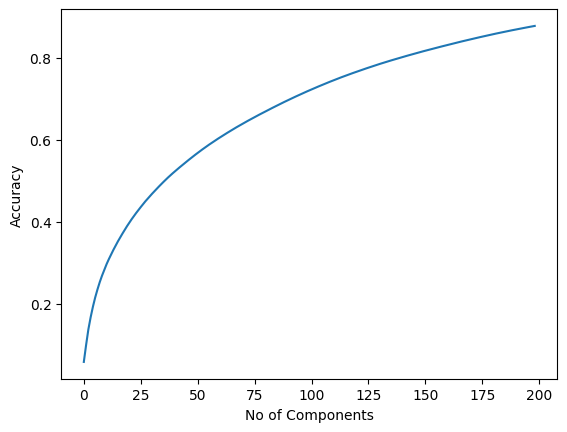

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Accuracy')
plt.show()